<a href="https://colab.research.google.com/github/srinugsr2020/Srini-Repository/blob/master/ml_chapter2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [204]:
import sys
print(sys.version_info)

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [205]:
import sklearn
print(sklearn.__version__)

0.21.3


In [206]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    print(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    print(tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

datasets/housing
datasets/housing/housing.tgz


In [0]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [208]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [209]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [210]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [211]:
housing['total_bedrooms'].value_counts()

280.0     55
331.0     51
345.0     50
393.0     49
343.0     49
          ..
2205.0     1
1448.0     1
1691.0     1
2537.0     1
2546.0     1
Name: total_bedrooms, Length: 1923, dtype: int64

In [212]:
housing_filter =housing[housing['ocean_proximity']!='ISLAND']
housing_filter.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20635.000000,20635.000000,20635.000000,20635.000000,20428.000000,20635.000000,20635.000000,20635.000000,20635.000000
mean,-119.569999,35.632412,28.636152,2636.020208,537.899305,1425.660286,499.593700,3.870944,206813.756288
std,2.003685,2.135918,12.583924,2181.794772,421.425970,1132.530137,382.357072,1.899961,115372.499511
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1448.000000,296.000000,787.000000,280.000000,2.563100,119600.000000
50%,-118.500000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.535200,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743700,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


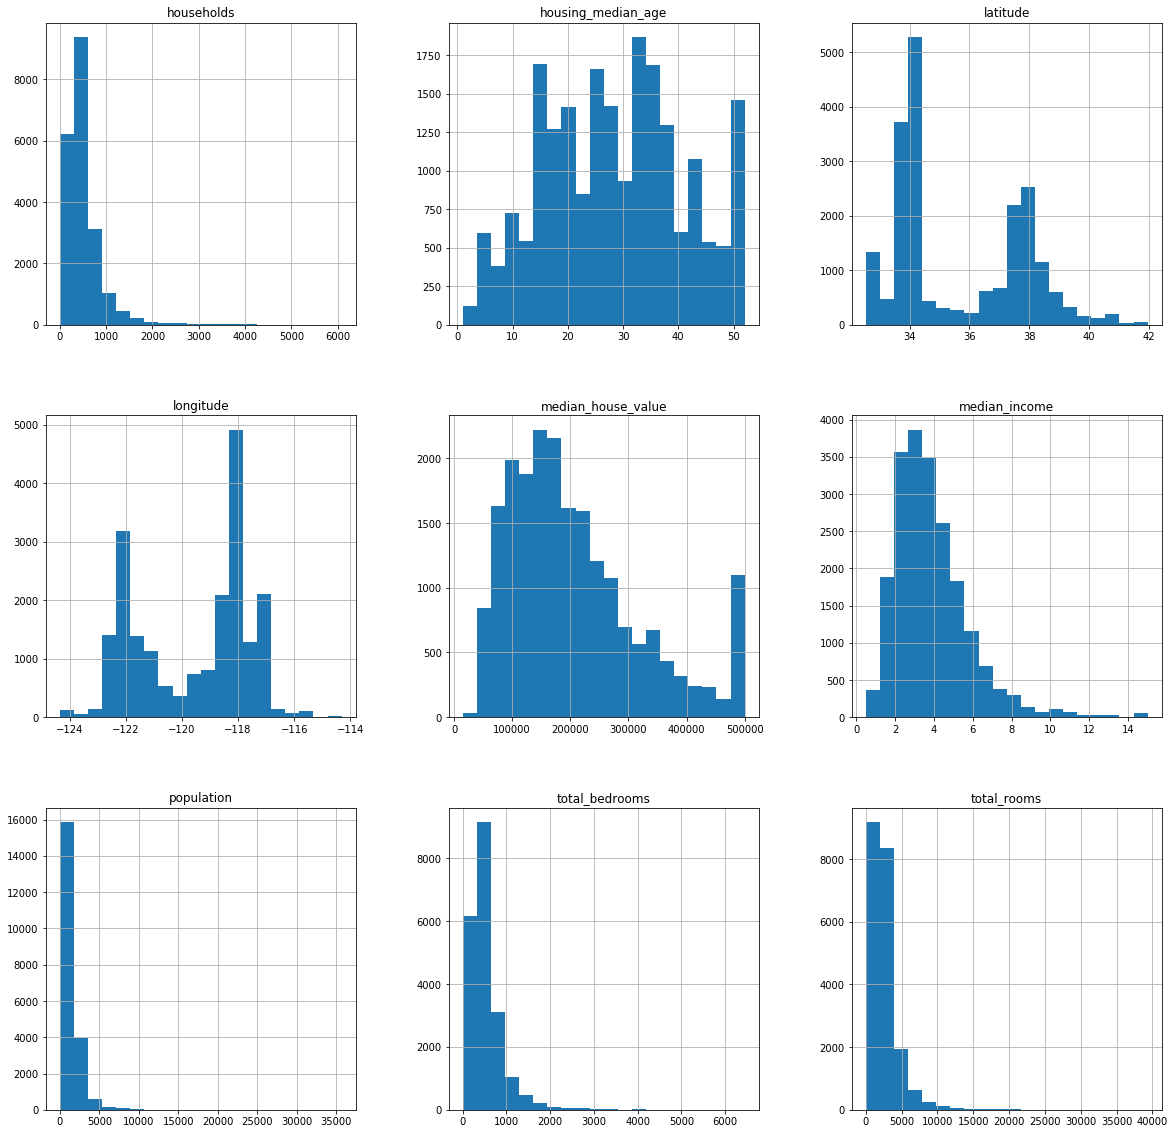

In [213]:
import matplotlib.pyplot as plt
housing.hist(bins=20,figsize=(20,20))
plt.show()

In [214]:
import numpy as np

def test_train_split(data,ratio):
  data_shuffle = np.random.permutation(len(data))
  ratio_extract = int(len(data)*ratio)
  test_set = data_shuffle[:ratio_extract]
  train_set = data_shuffle[ratio_extract:]
  return data.iloc[train_set],data.iloc[test_set]
  

train_set,test_set = test_train_split(housing,0.2)
len(train_set)


16512

In [0]:
housing['income_cat']= pd.cut(housing['median_income'],bins=[0,1.5,3,4.5,6,np.inf],labels=[1,2,3,4,5])

In [216]:
test_set['median_income'].value_counts()/len(test_set)

15.0001    0.003149
4.0000     0.003149
3.0000     0.003149
3.1250     0.002422
2.8750     0.002422
             ...   
1.6944     0.000242
7.7360     0.000242
2.6643     0.000242
9.3198     0.000242
2.1000     0.000242
Name: median_income, Length: 3469, dtype: float64

In [217]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['income_cat']):
  strat_train_index = housing.iloc[train_index]
  strat_test_index = housing.iloc[test_index]

print(strat_test_index['income_cat'].value_counts()/len(strat_test_index))

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64


In [218]:
housing['income_cat'].value_counts()/len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [219]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing,test_size=0.2,random_state=42)
test_set['income_cat'].value_counts()/len(test_set)

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

In [220]:
for set_ in (strat_train_index,strat_test_index):
  set_.drop('income_cat',axis=1,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [221]:
strat_train_index.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [0]:
strat_bkp = strat_train_index.copy()

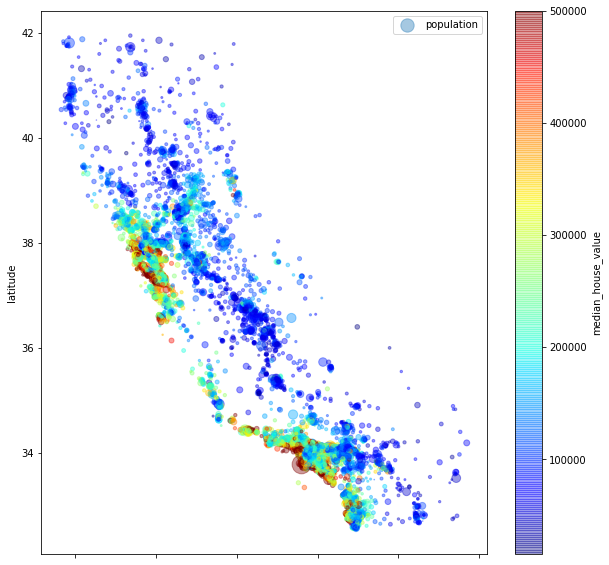

In [223]:
strat_train_index.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing['population']/100,label="population",figsize=(10,10),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)
plt.legend()

In [0]:
corr_matrix = strat_train_index.corr()

In [225]:
print(corr_matrix)

                    longitude  latitude  ...  median_income  median_house_value
longitude            1.000000 -0.924478  ...      -0.019583           -0.047432
latitude            -0.924478  1.000000  ...      -0.075205           -0.142724
housing_median_age  -0.105848  0.005766  ...      -0.111360            0.114110
total_rooms          0.048871 -0.039184  ...       0.200087            0.135097
total_bedrooms       0.076598 -0.072419  ...      -0.009740            0.047689
population           0.108030 -0.115222  ...       0.002380           -0.026920
households           0.063070 -0.077647  ...       0.010781            0.064506
median_income       -0.019583 -0.075205  ...       1.000000            0.687160
median_house_value  -0.047432 -0.142724  ...       0.687160            1.000000

[9 rows x 9 columns]


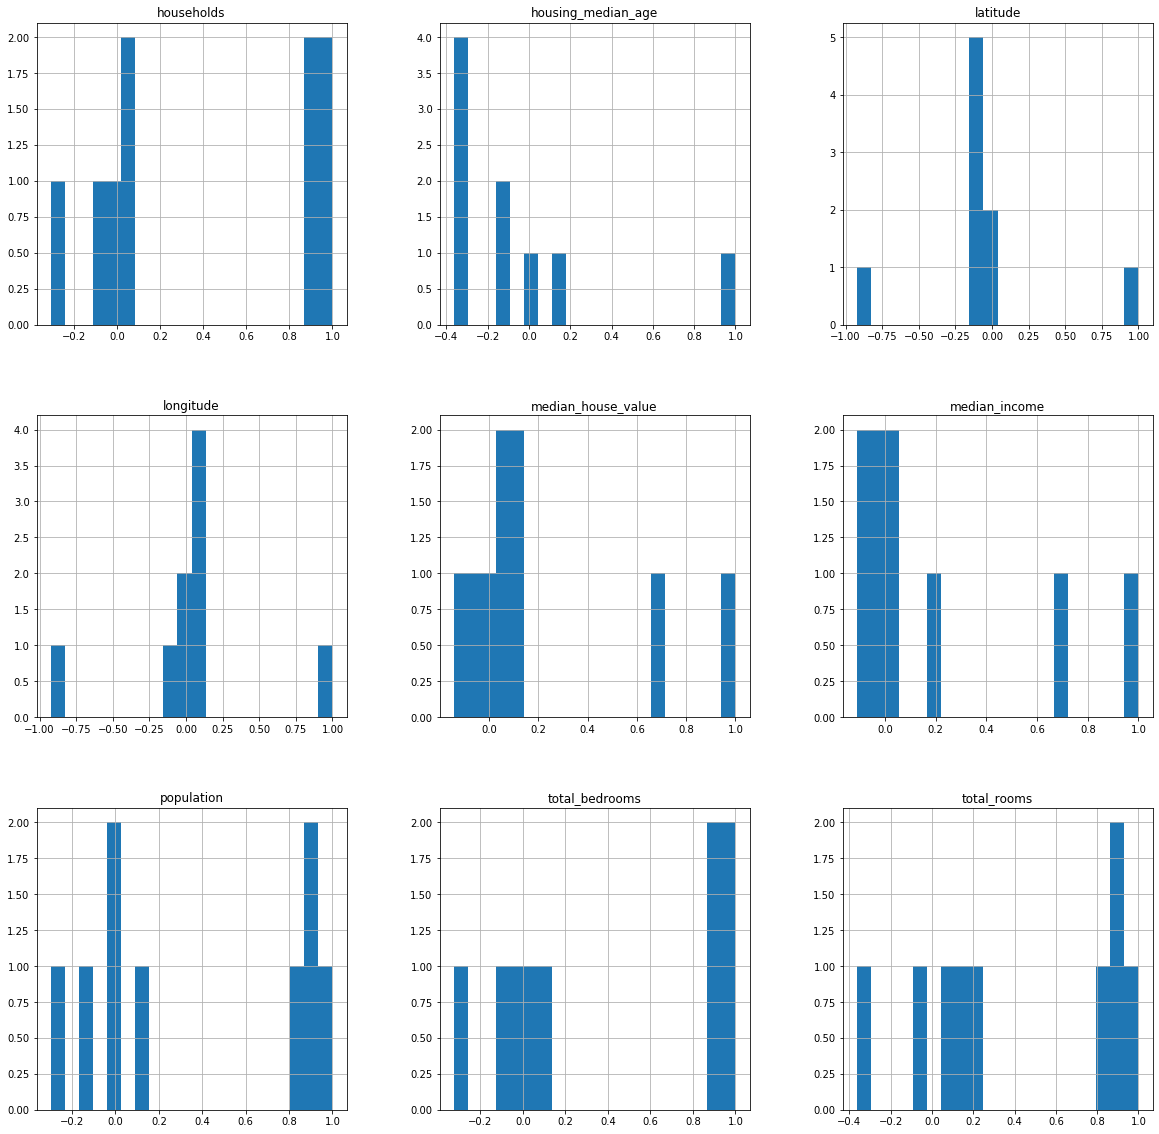

In [226]:
corr_matrix.hist(bins=20,figsize=(20,20))
plt.show()

In [227]:
corr_matrix['median_house_value'].sort_values()

latitude             -0.142724
longitude            -0.047432
population           -0.026920
total_bedrooms        0.047689
households            0.064506
housing_median_age    0.114110
total_rooms           0.135097
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc3ceb746a0>,
      dtype=object)

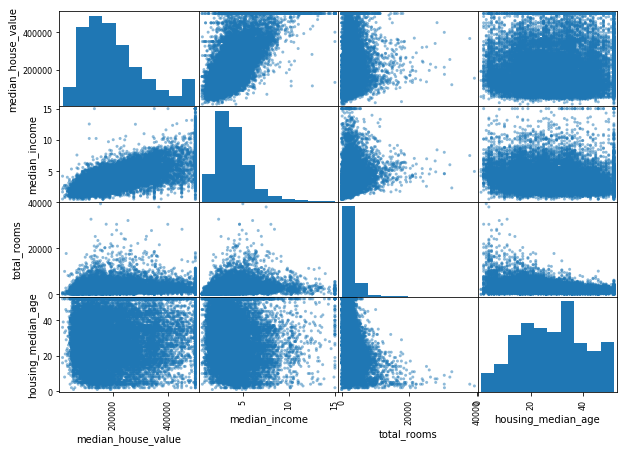

In [228]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(10,7))

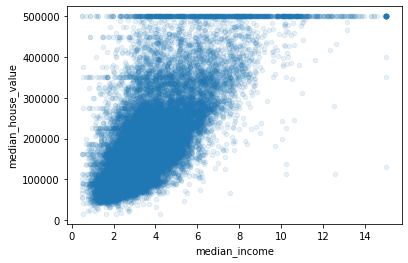

In [229]:
housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)

In [230]:
corr_matrix['median_house_value'].sort_values()

latitude             -0.142724
longitude            -0.047432
population           -0.026920
total_bedrooms        0.047689
households            0.064506
housing_median_age    0.114110
total_rooms           0.135097
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [0]:
housing["rooms_per_household"]=housing["total_rooms"]/housing['households']
housing["bedrooms_per_household"] = housing["total_bedrooms"]/housing["households"]
housing["persons_per_household"] = housing["population"]/housing["households"]

In [0]:
corr_matrix_update = housing.corr()

In [233]:
corr_matrix_update["median_house_value"].sort_values()

latitude                 -0.144160
bedrooms_per_household   -0.046739
longitude                -0.045967
population               -0.024650
persons_per_household    -0.023737
total_bedrooms            0.049686
households                0.065843
housing_median_age        0.105623
total_rooms               0.134153
rooms_per_household       0.151948
median_income             0.688075
median_house_value        1.000000
Name: median_house_value, dtype: float64

In [234]:
strat_train_index_labels = strat_train_index["median_house_value"].copy()
strat_train_index.drop("median_house_value",axis=1)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN
...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,<1H OCEAN


In [235]:
strat_train_index.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [236]:
strat_train_index.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


In [0]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [238]:
strat_train_index_nm = strat_train_index.drop("ocean_proximity",axis=1)
imputer.fit(strat_train_index_nm)
imputer.statistics_

array([-1.1851e+02,  3.4260e+01,  2.9000e+01,  2.1195e+03,  4.3300e+02,
        1.1640e+03,  4.0800e+02,  3.5409e+00,  1.7950e+05])

In [0]:
X = imputer.transform(strat_train_index_nm)

In [0]:
strat_train_index_tr = pd.DataFrame(X,columns=strat_train_index_nm.columns,index=strat_train_index_nm.index)

In [0]:
strat_train_index_ct = strat_train_index[['ocean_proximity']]

In [242]:
strat_train_index.values[:,2]

array([38.0, 14.0, 31.0, ..., 9.0, 31.0, 52.0], dtype=object)

In [243]:
strat_train_index.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
class CombineAttributAdder(BaseEstimator,TransformerMixin):
  def __init__(self,added_bedrooms_per_room=True):
    self.added_bedrooms_per_room=added_bedrooms_per_room
  def fit(self,X,y=None):
    return self
  def transform(self, X,y=None):
    rooms_per_household = X[:,3]/X[:,6]
    population_per_household = X[:,5]/X[:,6]
    if(self.added_bedrooms_per_room):
      bedrooms_per_household = X[:,4]/X[:,6]
      return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_household]
    else:
      return np.c_[X,rooms_per_household,population_per_household]
addl_attr_adder_cl = CombineAttributAdder(added_bedrooms_per_room=False)
addl_attr_numpy = addl_attr_adder_cl.transform(strat_train_index.values)
  

In [245]:
print(addl_attr_numpy)

[[-121.89 37.29 38.0 ... '<1H OCEAN' 4.625368731563422 2.094395280235988]
 [-121.93 37.05 14.0 ... '<1H OCEAN' 6.008849557522124 2.7079646017699117]
 [-117.2 32.77 31.0 ... 'NEAR OCEAN' 4.225108225108225 2.0259740259740258]
 ...
 [-116.4 34.09 9.0 ... 'INLAND' 6.34640522875817 2.742483660130719]
 [-118.01 33.82 31.0 ... '<1H OCEAN' 5.50561797752809 3.808988764044944]
 [-122.45 37.77 52.0 ... 'NEAR BAY' 4.843505477308295 1.9859154929577465]]


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
                         ('imputer',SimpleImputer(strategy='median')),
                         ("attribute_added",CombineAttributAdder()),
                         ("scaler",StandardScaler())
])
strat_train_index_tr=pd.DataFrame(num_pipeline.fit_transform(strat_train_index_nm),columns=['longitude', 'latitude', 'housing_median_age', 'total_rooms','total_bedrooms', 'population', 'households', 'median_income','median_house_value', 'rooms_per_household','population_per_household','bedrooms_per_household'],index=strat_train_index_nm.index)


In [247]:
strat_train_index_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,population_per_household,bedrooms_per_household
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-4.272678e-15,2.275755e-15,-2.700521e-16,8.606884e-17,1.181562e-16,-4.347735e-17,9.614940e-18,-2.225960e-16,-2.658834e-16,7.258944e-17,-1.592516e-17,-2.120758e-16
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.384937e+00,-1.449760e+00,-2.199168e+00,-1.223689e+00,-1.294944e+00,-1.269921e+00,-1.317668e+00,-1.772116e+00,-1.659401e+00,-1.650273e+00,-2.075303e-01,-1.763645e+00
25%,-1.111083e+00,-7.949406e-01,-8.472092e-01,-5.516890e-01,-5.793145e-01,-5.698825e-01,-5.803963e-01,-6.870806e-01,-7.535980e-01,-3.822514e-01,-5.741738e-02,-1.755345e-01
50%,5.324379e-01,-6.452675e-01,2.758786e-02,-2.353301e-01,-2.458409e-01,-2.292746e-01,-2.370459e-01,-1.756999e-01,-2.376062e-01,-7.966522e-02,-2.406537e-02,-9.753538e-02
75%,7.822131e-01,9.730728e-01,6.638039e-01,2.423650e-01,2.604547e-01,2.684162e-01,2.793106e-01,4.561338e-01,4.918697e-01,2.358755e-01,1.596812e-02,-6.081066e-03
max,2.630550e+00,2.951564e+00,1.856709e+00,1.716114e+01,1.381603e+01,3.071047e+01,1.293803e+01,5.839969e+00,2.532509e+00,5.225419e+01,1.070603e+02,5.917345e+01


In [248]:
#strat_train_index.drop("median_house_value",axis=1,inplace=True)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attrs = strat_train_index.columns
#cat_cols = ["ocean_proximity"]
complete_transformer = ColumnTransformer([
                                          ("num",num_pipeline,num_attrs),
                                          #("cat",OneHotEncoder(),cat_cols)
])

strat_train_index_complete = complete_transformer.fit_transform(strat_train_index)
#strat_train_index.columns

AttributeError: ignored

In [0]:
print(strat_train_index_complete[0])

In [0]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(strat_train_index_complete,strat_train_index_labels)

In [0]:
sample_data = strat_train_index[:5]
sample_index = strat_train_index[:5]
sample_tr = complete_transformer.fit_transform(sample_data)

In [0]:
print(sample_data.head())

In [0]:
strat_test_index.head()

In [0]:
strat_test_index_label = strat_test_index['median_house_value'].copy()
strat_test_index.drop("median_house_value",axis=1,inplace=True)

In [0]:
strat_test_index.head()

In [0]:
strat_test_index_complete = complete_transformer.fit_transform(strat_test_index)

In [0]:
strat_train_index_labels.head()

In [0]:
from sklearn.base import BaseEstimator, TransformerMixin
class CombineAttributAdder(BaseEstimator,TransformerMixin):
  def __init__(self,added_bedrooms_per_room=True):
    self.added_bedrooms_per_room=added_bedrooms_per_room
  def fit(self,X,y=None):
    return self
  def transform(self, X,y=None):
    rooms_per_household = X[:,3]/X[:,6]
    population_per_household = X[:,5]/X[:,6]
    if(self.added_bedrooms_per_room):
      bedrooms_per_household = X[:,4]/X[:,6]
      return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_household]
    else:
      return np.c_[X,rooms_per_household,population_per_household]
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
                         ('imputer',SimpleImputer(strategy='median')),
                         ("attribute_added",CombineAttributAdder()),
                         ("scaler",StandardScaler())
])

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
num_attrs = strat_train_index.columns[0:-1]
cat_cols = ["ocean_proximity"]
complete_transformer = ColumnTransformer([
                                          ("num",num_pipeline,num_attrs),
                                          ("cat",OneHotEncoder(),cat_cols)
])

strat_train_index_complete = complete_transformer.fit_transform(strat_train_index)

In [0]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(strat_train_index_complete,strat_train_index_labels)

In [0]:
strat_test_index_complete = complete_transformer.fit_transform(strat_test_index)
predictions =linear_reg.predict(strat_test_index_complete)

In [0]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(strat_test_index_label,predictions)

In [0]:
rmse = np.sqrt(error)
rmse

In [0]:
from sklearn.tree import DecisionTreeRegressor
decision_model = DecisionTreeRegressor()
decision_model.fit(strat_train_index_complete,strat_train_index_labels)
decistion_predictions = decision_model.predict(strat_test_index_complete)


In [0]:
decision_error = mean_squared_error(decistion_predictions,strat_test_index_label)
decision_rmse = np.sqrt(decision_error)
decision_rmse

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_model,strat_train_index_complete,strat_train_index_labels,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

In [0]:
linear_scores = cross_val_score(linear_reg,strat_train_index_complete,strat_train_index_labels,scoring="neg_mean_squared_error",cv=10)
linear_rmse_scores = np.sqrt(-linear_scores)
linear_rmse_scores.mean()
#linear_rmse_scores.std()

In [0]:
from sklearn.ensemble import RandomForestRegressor
random_frst = RandomForestRegressor()
random_frst_scores = cross_val_score(random_frst,strat_train_index_complete,strat_train_index_labels,scoring="neg_mean_squared_error",cv=10)
random_frst_scores

In [0]:
random_frst_scores_rmse = np.sqrt(-random_frst_scores)
random_frst_scores_rmse

In [0]:
from sklearn.svm import SVR
svr_model = SVR(kernel="linear")
svr_cross_val = cross_val_score(svr_model,strat_train_index_complete,strat_train_index_labels,scoring="neg_mean_squared_error",cv=10)
svr_cross_val_rmse = np.sqrt(-svr_cross_val)
svr_cross_val_rmse

In [249]:
from sklearn.model_selection import GridSearchCV

model_params = [
                {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
                {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]
grid_search = GridSearchCV(random_frst,model_params,cv=10,scoring="neg_mean_squared_error",return_train_score=True)
grid_search.fit(strat_train_index_complete,strat_train_index_labels)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'max_features': [2, 4, 6, 8],

In [250]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [251]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=6, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=30,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [252]:
grid_search.cv_results_

{'mean_fit_time': array([0.08138347, 0.26433191, 0.78110752, 0.1292032 , 0.4207998 ,
        1.26846964, 0.17948456, 0.5886153 , 1.7660289 , 0.23080535,
        0.75892985, 2.26155517, 0.12652249, 0.4069675 , 0.16427059,
        0.53846762, 0.20399721, 0.68101337]),
 'mean_score_time': array([0.00329878, 0.00861011, 0.0235683 , 0.00339262, 0.0086591 ,
        0.02309434, 0.00339789, 0.00855129, 0.02291999, 0.00336654,
        0.00852487, 0.02287047, 0.00386837, 0.00989833, 0.0037631 ,
        0.00990968, 0.00382881, 0.00991578]),
 'mean_test_score': array([-4.17204550e+09, -3.04380541e+09, -2.75165870e+09, -3.53869257e+09,
        -2.74917546e+09, -2.49799719e+09, -3.42816010e+09, -2.67442409e+09,
        -2.43933150e+09, -3.41914786e+09, -2.72002096e+09, -2.46332427e+09,
        -3.91429012e+09, -2.93337248e+09, -3.72295773e+09, -2.74869018e+09,
        -3.42363996e+09, -2.61111582e+09]),
 'mean_train_score': array([-1.11210648e+09, -5.74173858e+08, -4.33287661e+08, -9.46879045e+08,
 

In [254]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
  print(np.sqrt(-mean_score),params)

64591.373239723565 {'max_features': 2, 'n_estimators': 3}
55170.693370162444 {'max_features': 2, 'n_estimators': 10}
52456.255136033455 {'max_features': 2, 'n_estimators': 30}
59486.91087393004 {'max_features': 4, 'n_estimators': 3}
52432.58017398435 {'max_features': 4, 'n_estimators': 10}
49979.96784671383 {'max_features': 4, 'n_estimators': 30}
58550.49187480219 {'max_features': 6, 'n_estimators': 3}
51714.834354238206 {'max_features': 6, 'n_estimators': 10}
49389.58899518597 {'max_features': 6, 'n_estimators': 30}
58473.48001260727 {'max_features': 8, 'n_estimators': 3}
52153.82020726658 {'max_features': 8, 'n_estimators': 10}
49631.88767134569 {'max_features': 8, 'n_estimators': 30}
62564.28790059544 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54160.6173983536 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
61016.04481929946 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52427.95225924296 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [256]:
final_model = grid_search.best_estimator_
final_pred = final_model.predict(strat_test_index_complete)
final_mse = mean_squared_error(strat_test_index_label,final_pred)
np.sqrt(final_mse)

63386.80567964655